# Dallas Animal Shelter Analysis

## by Justin Sierchio

Since I reside in the Dallas/Ft. Worth Metroplex, I was particularly curious about the outcomes of animals taken to local shelters. This Jupyter Notebook will be examining animal shelter data for the City of Dallas, TX. 

This data is in .csv file format and is from dallasopendata.com. It can be found at:https://www.dallasopendata.com/api/views/7h2m-3um5/rows.csv?accessType=DOWNLOAD. Additional related information can be found at: https://www.dallasopendata.com/City-Services/FY2020-Dallas-Animal-Shelter-Data/7h2m-3um5.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_DAL = pd.read_csv("FY2020_Dallas_Animal_Shelter_Data.csv");

print('Datasets uploaded!');

Datasets uploaded!


C:\Users\jmsie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Dallas Animal Shelter dataset and display 1st 5 rows
df_DAL.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,006301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,007102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,004600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,016605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,006900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


Let's describe what each of the columns in this dataset mean.

<ul>
    <li>Animal ID: ID number for the animal shelter transaction</li>
    <li>Animal Type: Basic type of animal</li>
    <li>Animal Breed: Breed of the animal</li>
    <li>Kennel Number Number of Kennel</li>
    <li>Kennel Status: Status of animal in kennel</li>
    <li>Tag Type: Type of tag used for animal</li>
    <li>Activity number: Unknown</li>
    <li>Activity sequence: Unknown</li>
    <li>Source ID: ID number for the source of the animal</li>
    <li>Census Tract: Unknown</li>
    <li>Council District: City Council District for animal source</li>
    <li>Intake Type: Was the animal a stray?</li>
    <li>Reason: Reason animal was taken into shelter</li>
    <li>Staff ID: ID of staff member taking animal into shelter(?)</li>
    <li>Intake Date: Date of intake for animal</li>
    <li>Intake Time: Time of intake for animal</li>
    <li>Due Out: Date animal was due out(?)</li>
    <li>Intake Condition: Condition of animal when intake completed</li>
    <li>Hold Request: Request for holding animal (i.e. adoption)</li>
    <li>Outcome Type: Outcome after intake completed</li>
    <li>Outcome Subtype: Specific outcome after intake completed</li>
    <li>Outcome Date: Date of outcome for animal</li>
    <li>Outcome Time: Time of intake for animal</li>
    <li>Receipt Number: Receipt for outcome transaction</li>
    <li>Impound Number: Number for impounding animal</li>
    <li>Service Request Number: Number for service request</li>
    <li>Outcome Condition: condition of animal at outcome</li>
    <li>Chip Status: Whether animal was microchipped or not</li>
    <li>Animal Origin: Where did animal come from</li>
    <li>Additional Information: If given</li>
    <li>Month: Month of Transaction</li>
    <li>Year: Year of Tranaction</li>

## Data Cleaning

First, let's get a sense of the quality of the dataset.

In [4]:
# Characteristics of the Dallas Animal Shelter dataset
df_DAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Animal Id               30194 non-null  object 
 1   Animal Type             30194 non-null  object 
 2   Animal Breed            30194 non-null  object 
 3   Kennel Number           30194 non-null  object 
 4   Kennel Status           30194 non-null  object 
 5   Tag Type                0 non-null      float64
 6   Activity Number         16282 non-null  object 
 7   Activity Sequence       30194 non-null  int64  
 8   Source Id               30194 non-null  object 
 9   Census Tract            25018 non-null  object 
 10  Council District        25018 non-null  object 
 11  Intake Type             30194 non-null  object 
 12  Intake Subtype          30194 non-null  object 
 13  Intake Total            30194 non-null  int64  
 14  Reason                  28202 non-null

As we can first see, there is no tag number data and little service request number data provided. We can remove these columns from the dataset.

In [5]:
# Drop 'Tag Type' and 'Service Request Number' from Dallas Animal Shelter dataset
df_DAL1 = df_DAL.drop(['Tag Type', 'Service Request Number'], axis=1)
df_DAL1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Animal Id               30194 non-null  object
 1   Animal Type             30194 non-null  object
 2   Animal Breed            30194 non-null  object
 3   Kennel Number           30194 non-null  object
 4   Kennel Status           30194 non-null  object
 5   Activity Number         16282 non-null  object
 6   Activity Sequence       30194 non-null  int64 
 7   Source Id               30194 non-null  object
 8   Census Tract            25018 non-null  object
 9   Council District        25018 non-null  object
 10  Intake Type             30194 non-null  object
 11  Intake Subtype          30194 non-null  object
 12  Intake Total            30194 non-null  int64 
 13  Reason                  28202 non-null  object
 14  Staff Id                30194 non-null  object
 15  In

We can also see from our view of the data that 'Activity Number', 'Receipt Number', 'Census Tract' and 'Additional Information' will not be very useful, given that in each case much of the data is missing. Let's remove those rows.

In [6]:
# Drop 'Activity Number', 'Receipt Number' and 'Additional Information' from Dallas Animal Shelter dataset
df_DAL2 = df_DAL1.drop(['Activity Number', 'Receipt Number', 'Census Tract', 'Additional Information'], axis=1)
df_DAL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal Id          30194 non-null  object
 1   Animal Type        30194 non-null  object
 2   Animal Breed       30194 non-null  object
 3   Kennel Number      30194 non-null  object
 4   Kennel Status      30194 non-null  object
 5   Activity Sequence  30194 non-null  int64 
 6   Source Id          30194 non-null  object
 7   Council District   25018 non-null  object
 8   Intake Type        30194 non-null  object
 9   Intake Subtype     30194 non-null  object
 10  Intake Total       30194 non-null  int64 
 11  Reason             28202 non-null  object
 12  Staff Id           30194 non-null  object
 13  Intake Date        30194 non-null  object
 14  Intake Time        30194 non-null  object
 15  Due Out            30194 non-null  object
 16  Intake Condition   30194 non-null  objec

Let'see how many 'NULL' values we have in this dataset.

In [7]:
# Find the 'NULL' values in the Dallas Animal Shelters dataset
df_DAL2.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Animal Id          30194 non-null  bool 
 1   Animal Type        30194 non-null  bool 
 2   Animal Breed       30194 non-null  bool 
 3   Kennel Number      30194 non-null  bool 
 4   Kennel Status      30194 non-null  bool 
 5   Activity Sequence  30194 non-null  bool 
 6   Source Id          30194 non-null  bool 
 7   Council District   30194 non-null  bool 
 8   Intake Type        30194 non-null  bool 
 9   Intake Subtype     30194 non-null  bool 
 10  Intake Total       30194 non-null  bool 
 11  Reason             30194 non-null  bool 
 12  Staff Id           30194 non-null  bool 
 13  Intake Date        30194 non-null  bool 
 14  Intake Time        30194 non-null  bool 
 15  Due Out            30194 non-null  bool 
 16  Intake Condition   30194 non-null  bool 
 17  Hold Request

Since 'Hold Request', 'Animal Origin', 'Reason', 'Chip Status' and 'Outcome Condition' information might be useful, let us replace all the unknown values with 'NONE'.

In [8]:
# Fill Blank Values in 'Hold Request' with 'NONE'
df_DAL2['Hold Request'].fillna('NONE', inplace = True);
df_DAL2['Reason'].fillna('NONE', inplace = True);
df_DAL2['Outcome Condition'].fillna('UNKNOWN', inplace = True);
df_DAL2['Animal Origin'].fillna('NONE', inplace = True);
df_DAL2['Chip Status'].fillna('NONE', inplace = True);
df_DAL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal Id          30194 non-null  object
 1   Animal Type        30194 non-null  object
 2   Animal Breed       30194 non-null  object
 3   Kennel Number      30194 non-null  object
 4   Kennel Status      30194 non-null  object
 5   Activity Sequence  30194 non-null  int64 
 6   Source Id          30194 non-null  object
 7   Council District   25018 non-null  object
 8   Intake Type        30194 non-null  object
 9   Intake Subtype     30194 non-null  object
 10  Intake Total       30194 non-null  int64 
 11  Reason             30194 non-null  object
 12  Staff Id           30194 non-null  object
 13  Intake Date        30194 non-null  object
 14  Intake Time        30194 non-null  object
 15  Due Out            30194 non-null  object
 16  Intake Condition   30194 non-null  objec

Now that we know we have no 'NULL' values, let's drop any remaining NaN values to make the analysis easier.

In [9]:
# Drop rows with NaN Values
df_DAL3 = df_DAL2.dropna();

# Drop Extra Stray Values that make no sense
df_DAL3 = df_DAL3[df_DAL3['Council District'] != 'AS']
df_DAL3 = df_DAL3[df_DAL3['Council District'] != '00']
df_DAL3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24838 entries, 0 to 30190
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal Id          24838 non-null  object
 1   Animal Type        24838 non-null  object
 2   Animal Breed       24838 non-null  object
 3   Kennel Number      24838 non-null  object
 4   Kennel Status      24838 non-null  object
 5   Activity Sequence  24838 non-null  int64 
 6   Source Id          24838 non-null  object
 7   Council District   24838 non-null  object
 8   Intake Type        24838 non-null  object
 9   Intake Subtype     24838 non-null  object
 10  Intake Total       24838 non-null  int64 
 11  Reason             24838 non-null  object
 12  Staff Id           24838 non-null  object
 13  Intake Date        24838 non-null  object
 14  Intake Time        24838 non-null  object
 15  Due Out            24838 non-null  object
 16  Intake Condition   24838 non-null  objec

Let's show the 1st 10 rows of the updated dataset.

In [10]:
# Display 1st 10 rows of updated dataset
df_DAL3.head(10)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Sequence,Source Id,Council District,Intake Type,Intake Subtype,...,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Impound Number,Outcome Condition,Chip Status,Animal Origin,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,1,P0098773,4,OWNER SURRENDER,GENERAL,...,RETURNED TO OWNER,WALK IN,11/09/2019,11:31:00,K19-486742,APP SICK,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,1,P0492284,2,OWNER SURRENDER,DEAD ON ARRIVAL,...,DEAD ON ARRIVAL,DISPOSAL,11/10/2019,00:00:00,K19-486954,DEAD,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,1,P9991718,1,STRAY,AT LARGE,...,RETURNED TO OWNER,FIELD,10/03/2019,13:36:00,K19-482022,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,1,P0903792,8,OWNER SURRENDER,GENERAL,...,TRANSFER,MEDICAL-CONTAGIOUS,10/15/2019,17:35:00,K19-483073,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,1,P0890077,1,STRAY,AT LARGE,...,RETURNED TO OWNER,WALK IN,11/09/2019,12:57:00,K19-486694,APP WNL,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020
5,A0570248,DOG,LABRADOR RETR,RECEIVING,IMPOUNDED,1,P0820658,5,OWNER SURRENDER,GENERAL,...,DIED,ENROUTE,10/21/2019,11:00:00,K19-484308,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,OCT.2019,FY2020
6,A0578275,DOG,BICHON FRISE,LFD 081,UNAVAILABLE,1,P0906275,6,OWNER SURRENDER,GENERAL,...,TRANSFER,MEDICAL-CONTAGIOUS,11/02/2019,11:55:00,K19-485846,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020
7,A0601024,DOG,PITBULL,RECEIVING,UNAVAILABLE,1,P9991721,4,STRAY,AT LARGE,...,RETURNED TO OWNER,FIELD,10/18/2019,15:28:00,K19-484057,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,OCT.2019,FY2020
8,A0601024,DOG,PITBULL,LAB 14,LAB,1,P0556316,4,OWNER SURRENDER,GENERAL,...,EUTHANIZED,BITE,11/13/2019,16:34:00,K19-486943,APP WNL,SCAN CHIP,FIELD,NOV.2019,FY2020
9,A0601180,DOG,COLLIE SMOOTH,LFD 076,IMPOUNDED,1,P0584572,4,OWNER SURRENDER,RETURN30,...,EUTHANIZED,HUMANE,11/06/2019,12:59:00,K19-486443,APP SICK,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020


At this point, it appears we have done enough cleaning to begin data exploration.

## Data Exploration

To begin, let's look at the types of animals that are brought to the shelters in Dallas.

In [11]:
# Find the general types of animals brought to shelters in Dallas
df_DAL3_AnimalTypes = df_DAL3['Animal Type'];

# Find the specific types of animals (top 10) that are brought to shelters in Dallas
df_DAL3_AnimalSpecific = df_DAL3['Animal Breed'];

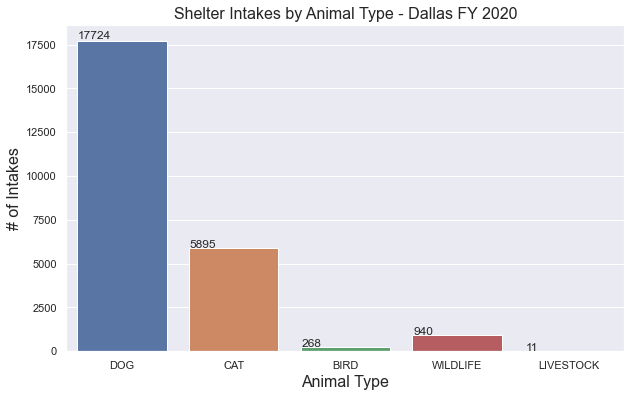

In [12]:
# Plot the General Types of animals brought into shelters in Dallas
# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(x="Animal Type", data=df_DAL3)

# Set the Title and Axes
ax.set_title('Shelter Intakes by Animal Type - Dallas FY 2020', fontsize = 16)
ax.set_ylabel('# of Intakes', fontsize = 16)
ax.set_xlabel('Animal Type', fontsize = 16)

# Annotate the plot with the # of animal intakes
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)

As we can see, animal intakes are dominated by dogs and cats. Let's look more specifically at say the top 15 breeds intaken.

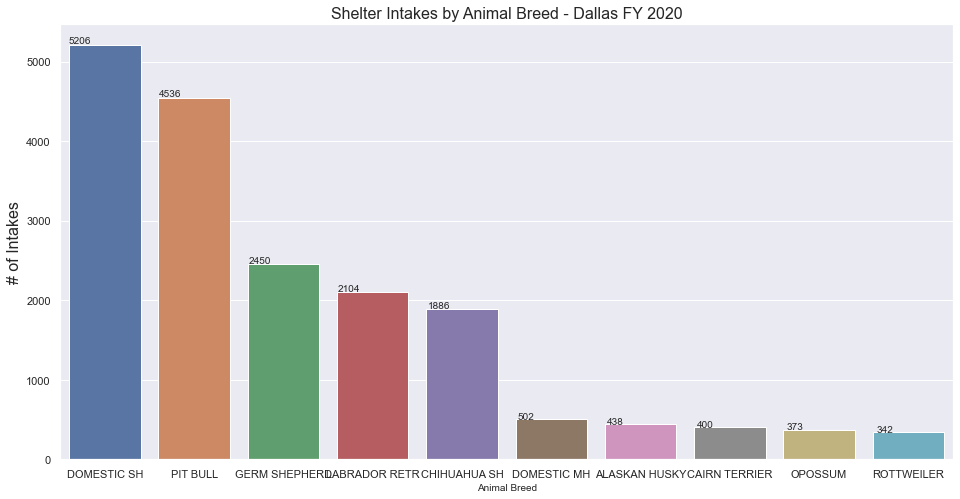

In [13]:
# Plot the General Types of animals brought into shelters in Dallas
# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(x="Animal Breed", data=df_DAL3, order=df_DAL3['Animal Breed'].value_counts().iloc[:10].index)

# Set the Title and Axes
ax.set_title('Shelter Intakes by Animal Breed - Dallas FY 2020', fontsize = 16)
ax.set_ylabel('# of Intakes', fontsize = 16)
ax.set_xlabel('Animal Breed', fontsize = 10)

# Annotate the plot with the # of animal intakes
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)

Looking at the specific data, domestic shorthaired dogs are the number one animal breed intaken in the shelters, followed closely by pitbulls.

Next, let's get a sense of why the animals are taken to the shelter by looking at the reasons and intake types, respectively.

In [14]:
# Find the reasons animals are brought to shelters in Dallas
df_DAL3_Reason = df_DAL3['Reason'];
df_DAL3_Reason.value_counts().head(10)

OTHRINTAKS    12689
OTHER          7993
PERSNLISSU     1083
MEDICAL        1032
HOUSING         775
BEHAVIOR        705
NOTRIGHTFT      348
FINANCIAL       213
Name: Reason, dtype: int64

While the bulk of the reasons are apparently unknown, we see common themes of personal issues, medical issues and lack of housing. Animal behavior is # 6 on the list. 

In [15]:
# Find the specific types of animals (top 10) that are brought to shelters in Dallas
df_DAL3_IntakeType = df_DAL3['Intake Type'];
df_DAL3_IntakeType.value_counts().head(10)

STRAY              14899
OWNER SURRENDER     4053
FOSTER              2227
CONFISCATED         1177
TREATMENT           1153
WILDLIFE             895
TRANSFER             311
KEEPSAFE              88
DISPOS REQ            35
Name: Intake Type, dtype: int64

For intake types, we see nearly 1/2 of the animals are strays, followed by owner surrenders, fosters, and confiscations. Given the urban environment, it is not surprising to see a lack of wildlife.

Now that we have a general sense of the initial picture of animal shelters in Dallas, let's attempt to answer our original question, which was to look at the outcomes of animals entering shelters.

## Data Analysis

In order to evaluate animal outcomes, let's look at the columns 'Outcome Type', 'Outcome Subtype', and 'Outcome Condition'.

In [16]:
# Find the Outcome Types in Dallas
df_DAL3_OutcomeType = df_DAL3['Outcome Type'];
df_DAL3_OutcomeType.value_counts().head(15)

ADOPTION             7859
RETURNED TO OWNER    6144
TRANSFER             4026
FOSTER               2668
EUTHANIZED           2087
TREATMENT            1154
WILDLIFE              401
DIED                  272
DEAD ON ARRIVAL       148
DISPOSAL               55
MISSING                16
OTHER                   5
FOUND EXP               3
Name: Outcome Type, dtype: int64

Let's look at these outcomes in terms of a percentage of the overall number of cases.

In [17]:
# Turn the Outcome Type Values in a % of the Overall Case Total
df_DAL3['Outcome Type Frequency'] = df_DAL3['Outcome Type'].value_counts()
df_DAL3_OutcomeTypePerc = 100. * df_DAL3['Outcome Type'].value_counts() / len(df_DAL3);
print('Intake Outcomes for Dallas Animal Shelters - FY20\n')
print('Outcome             Percentage')
print(df_DAL3_OutcomeTypePerc)

Intake Outcomes for Dallas Animal Shelters - FY20

Outcome             Percentage
ADOPTION             31.641034
RETURNED TO OWNER    24.736291
TRANSFER             16.209035
FOSTER               10.741606
EUTHANIZED            8.402448
TREATMENT             4.646107
WILDLIFE              1.614462
DIED                  1.095096
DEAD ON ARRIVAL       0.595861
DISPOSAL              0.221435
MISSING               0.064417
OTHER                 0.020130
FOUND EXP             0.012078
Name: Outcome Type, dtype: float64


So in 31.6% of the cases, the animals taken to the shelter are adopted, followed by 24.7% that are returned to their owners and another 16.2% that are transferred - to other shelters?

Of the total number, approximately 8.4% are euthanized while approximately 3.5% of the animals either die in custody, are DOA, or are disposed.

Of the animals that are euthanized, let's find out which animals are most likely to have that outcome.

In [18]:
# Determine which animals are being euthanized in Dallas animal shelters
df_DAL3_Euthanized = df_DAL3[df_DAL3['Outcome Type'].str.contains("EUTHANIZED")]
df_DAL3_Euthanized.head(5)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Sequence,Source Id,Council District,Intake Type,Intake Subtype,...,Outcome Subtype,Outcome Date,Outcome Time,Impound Number,Outcome Condition,Chip Status,Animal Origin,Month,Year,Outcome Type Frequency
8,A0601024,DOG,PITBULL,LAB 14,LAB,1,P0556316,4,OWNER SURRENDER,GENERAL,...,BITE,11/13/2019,16:34:00,K19-486943,APP WNL,SCAN CHIP,FIELD,NOV.2019,FY2020,NaN
9,A0601180,DOG,COLLIE SMOOTH,LFD 076,IMPOUNDED,1,P0584572,4,OWNER SURRENDER,RETURN30,...,HUMANE,11/06/2019,12:59:00,K19-486443,APP SICK,SCAN CHIP,OVER THE COUNTER,NOV.2019,FY2020,NaN
13,A0638012,DOG,ROTTWEILER,RECEIVING,IMPOUNDED,1,P0787875,8,OWNER SURRENDER,EUTHANASIA REQUESTED,...,HUMANE,12/16/2019,15:24:00,K19-491028,APP SICK,SCAN CHIP,SWEEP,DEC.2019,FY2020,NaN
20,A0669554,DOG,LABRADOR RETR,VT 11,IMPOUNDED,1,P0908720,4,OWNER SURRENDER,EUTHANASIA REQUESTED,...,HUMANE,11/22/2019,16:58:00,K19-488358,UNKNOWN,SCAN CHIP,FIELD,NOV.2019,FY2020,NaN
22,A0689860,DOG,ROTTWEILER,LAB 04,LAB,1,P0531548,14,CONFISCATED,QUARANTINE,...,BITE,10/21/2019,17:05:00,K19-484321,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,OCT.2019,FY2020,NaN


In [19]:
# Find the general types of animals euthanized in Dallas shelters
df_DAL3_EuthanizedTypes = df_DAL3_Euthanized['Animal Type'];

# Find the specific types of animals (top 10) that are euthanized in shelters in Dallas
df_DAL3_EuthanizedSpecific = df_DAL3_Euthanized['Animal Breed'];

Text(0.5, 0, 'Animal Type')

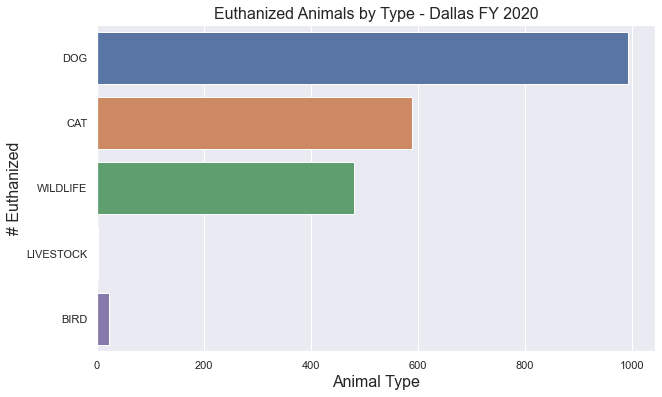

In [20]:
# Plot the General Types of animals brought into shelters in Dallas

# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(y="Animal Type", data=df_DAL3_Euthanized)

# Set the Title and Axes
ax.set_title('Euthanized Animals by Type - Dallas FY 2020', fontsize = 16)
ax.set_ylabel('# Euthanized', fontsize = 16)
ax.set_xlabel('Animal Type', fontsize = 16)

As one can see compared to the original intakes, dogs have a higher likelihood of being euthanized than cats. However, wildlife are also disproportionally euthanized. The latter is not surprising as they cannot be placed into foster care and may carry diseases.

Let's look at the cases for specific animal breeds.

Text(0.5, 0, 'Animal Breed')

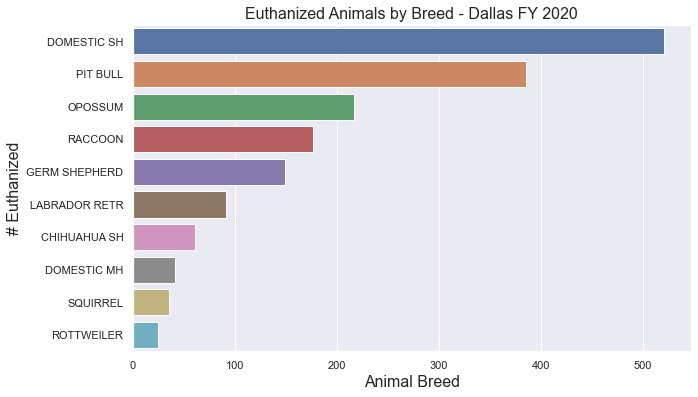

In [21]:
# Plot the Specific Breeds of animals brought into shelters in Dallas

# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(y="Animal Breed", data=df_DAL3_Euthanized, order=df_DAL3_Euthanized['Animal Breed']
                   .value_counts().iloc[:10].index)

# Set the Title and Axes
ax.set_title('Euthanized Animals by Breed - Dallas FY 2020', fontsize = 16)
ax.set_ylabel('# Euthanized', fontsize = 16)
ax.set_xlabel('Animal Breed', fontsize = 16)

This plot confirms our earlier hypotheses. While domestic shorthaired dogs are the mostly likely animal to be euthanized, they are closely followed by pitbulls (which often leave a negative impression with the populace). Subsequently we see that opossums and raccoons are the next animals to be euthanized (as they are most likely wildlife).

As we discussed earlier, let's look at 'Outcome Condition'.

In [22]:
# Find the Outcome Conditions in Dallas
df_DAL3_OutcomeCondition = df_DAL3['Outcome Condition'];
df_DAL3_OutcomeCondition.value_counts().head(15)

APP WNL                                   15694
TREATABLE REHABILITABLE NON-CONTAGIOUS     2961
UNDERAGE                                   1622
APP SICK                                   1334
APP INJ                                     766
UNKNOWN                                     749
CRITICAL                                    595
UNHEALTHY UNTREATABLE NON-CONTAGIOUS        349
DECEASED                                    184
DEAD                                        169
FATAL                                       149
HEALTHY                                     134
TREATABLE MANAGEABLE NON-CONTAGIOUS          65
TREATABLE REHABILITABLE CONTAGIOUS           37
UNHEALTHY UNTREATABLE CONTAGIOUS             27
Name: Outcome Condition, dtype: int64

To make this data more understandable, we will convert the raw numbers to percentages.

In [23]:
# Turn the Outcome Condition Values in a % of the Overall Case Total
df_DAL3['Outcome Condition Frequency'] = df_DAL3['Outcome Condition'].value_counts()
df_DAL3_OutcomeCondPerc = 100. * df_DAL3['Outcome Condition'].value_counts() / len(df_DAL3);
print('Outcome Conditions for Dallas Animal Shelters - FY20\n')
print('Conditions                               Percentage')
print(df_DAL3_OutcomeCondPerc)

Outcome Conditions for Dallas Animal Shelters - FY20

Conditions                               Percentage
APP WNL                                   63.185442
TREATABLE REHABILITABLE NON-CONTAGIOUS    11.921250
UNDERAGE                                   6.530316
APP SICK                                   5.370803
APP INJ                                    3.083984
UNKNOWN                                    3.015541
CRITICAL                                   2.395523
UNHEALTHY UNTREATABLE NON-CONTAGIOUS       1.405105
DECEASED                                   0.740800
DEAD                                       0.680409
FATAL                                      0.599887
HEALTHY                                    0.539496
TREATABLE MANAGEABLE NON-CONTAGIOUS        0.261696
TREATABLE REHABILITABLE CONTAGIOUS         0.148965
UNHEALTHY UNTREATABLE CONTAGIOUS           0.108704
TREATABLE MANAGEABLE CONTAGIOUS            0.012078
Name: Outcome Condition, dtype: float64


As we can see, at least 76% of the animal outcomes are favorable, while only 3% end up fatal. It appears the remaining 21% of cases could go either way.

As a final analysis, let's look at a time analysis to determine what times of the year animals are taken to the shelter.

In [41]:
# When are animals
df_DAL3_Month = df_DAL3['Month'];
df_DAL4_Month = df_DAL3_Month.value_counts().head(12);
df_DAL4_Month

OCT.2019    3792
JAN.2020    3478
NOV.2019    3333
DEC.2019    3147
FEB.2020    2394
MAR.2020    2107
MAY.2020    1434
JUL.2020    1417
JUN.2020    1400
APR.2020    1181
AUG.2020    1116
SEP.2020      39
Name: Month, dtype: int64

Given that September 2020 has not yet completed at the time of this analysis, let's replace its value with an extrapolated value based upon a 30-day month.

In [47]:
# Replace September 2020 value with extrapolated approximation
df_DAL4_Month.at['SEP.2020'] = 1170; # 39 cases/day x 30 days
df_DAL4_Month

OCT.2019    3792
JAN.2020    3478
NOV.2019    3333
DEC.2019    3147
FEB.2020    2394
MAR.2020    2107
MAY.2020    1434
JUL.2020    1417
JUN.2020    1400
APR.2020    1181
AUG.2020    1116
SEP.2020    1170
Name: Month, dtype: int64

Now let's plot the number of cases per month.

Text(0.5, 1.0, 'Animal Intakes - Dallas Shelters FY 2020')

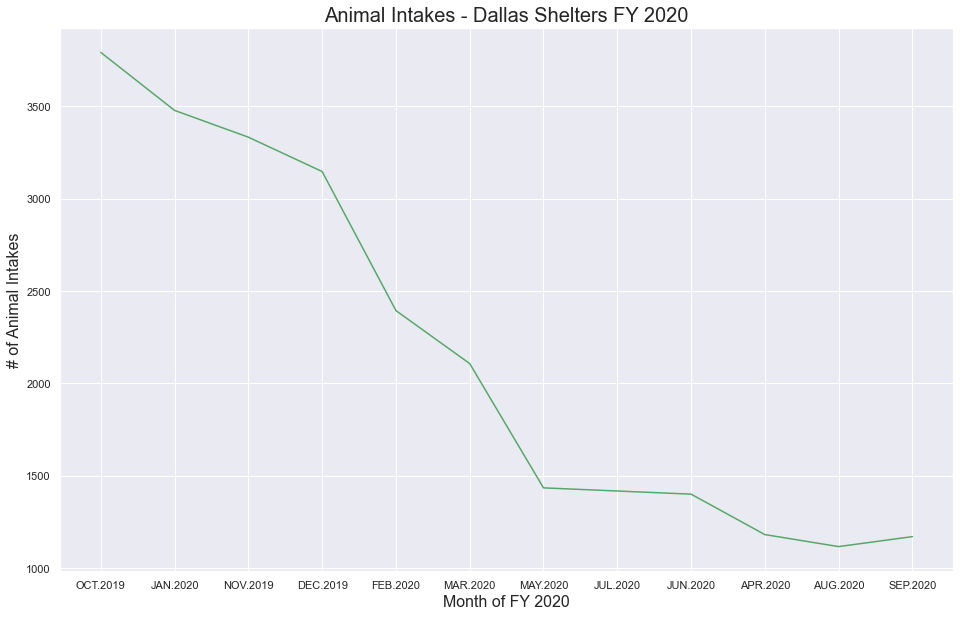

In [124]:
# Plot the Animal Shelter Intakes per month from October 2019 to September 2020 in Dallas
x = df_DAL4_Month.index;
y = df_DAL4_Month;

fig= plt.figure(figsize=(16,10))
plt.plot(x, y, 'g-')
plt.xlabel('Month of FY 2020', fontsize  = 16)
plt.ylabel('# of Animal Intakes', fontsize = 16)
plt.title('Animal Intakes - Dallas Shelters FY 2020', fontsize  = 20)

We see a dramatic decline in the number of intakes over the course of the fiscal year. Much of this decline may be due to the COVID-19 pandemic and the public closure of the animal shelters in the area.

Since we have what appears to be a linear plot, let's see if we can't use linear regression to apply a trendline.

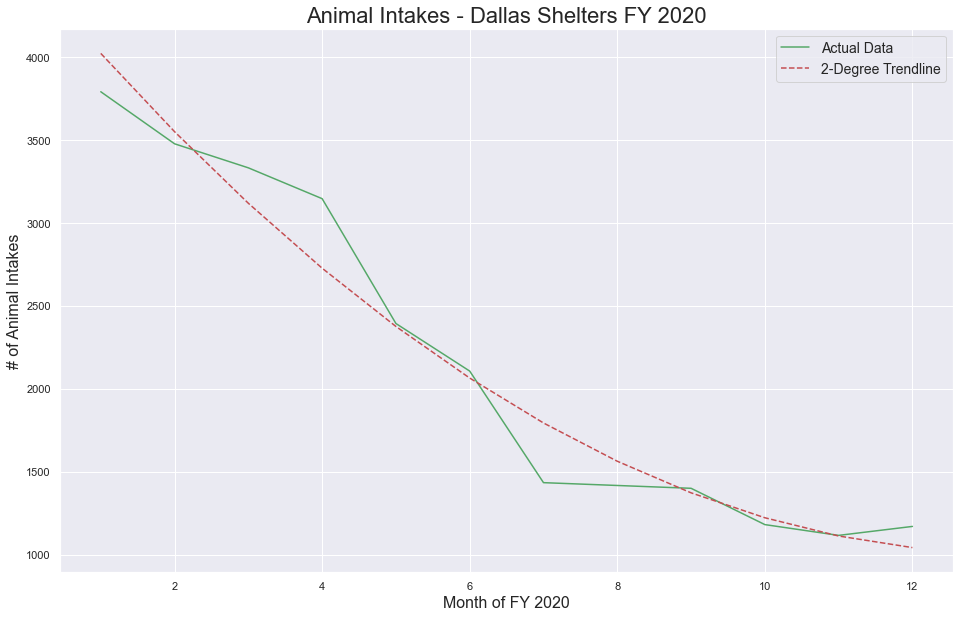

In [126]:
# Create a Plot of Animal Intakes with a Trendline superimposed

# Plot the Animal Shelter Intakes per month from October 2019 to September 2020 in Dallas
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]; # Convert Dates to Values
y = df_DAL4_Month;

fig= plt.figure(figsize=(16,10))
plt.plot(x, y, 'g-')
plt.xlabel('Month of FY 2020', fontsize  = 16)
plt.ylabel('# of Animal Intakes', fontsize = 16)
plt.title('Animal Intakes - Dallas Shelters FY 2020', fontsize  = 22)

# Create the Trendline and Superimpose It
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.legend(('Actual Data', '2-Degree Trendline'), fontsize = 14)

Let's display the trendline function.

In [127]:
# Display the Trendline Function for the Animal Intakes
print('Animal Intake Trendline Function Coefficients')
print(z)

Animal Intake Trendline Function Coefficients
[  20.11013986 -532.42132867 4535.52272727]


Finally, let's display the R^2 Value for our Trendline.

In [128]:
# Determine R^2 Value

# Import R^2 Value from Sk-Learn
from sklearn.metrics import r2_score

# Calculate the R^2 Value
coefficient_of_dermination = r2_score(y, p(x));

# Display the R^2 Value
print('The R^2 Value is: ', coefficient_of_dermination)

The R^2 Value is:  0.9606550364127907


As we can see, we can model the animal intakes in Dallas shelters with a 2nd degree regression analysis within 96% accuracy.

## Results and Discussion

In this open-ended project, we were able to arrive at some interesting results:

<ul>
    <li>(1) Dogs and cats are by far the most likely animals brought to a shelter.</li>
    <li>(2) Pitbulls, opossums and raccoons are the most likely animals to be euthanized.</li>
    <li>(3) At least 76% of the animals have a favorable outcome.</li>
    <li>(4) Animal shelter intakes have rapidly dropped in the last 12 months.</li>
</ul>

## Conclusion

The goal of this project was to explore any trends in the City of Dallas animal shelter data for FY2020. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!